# FEATURE SELECTION IN CATEGORICAL INPUT & CATEGORICAL OUTPUT

The two most commonly used feature selection methods for categorical input data when the target variable is also categorical  are the chi-squared statistic and the mutual information statistic. As the basis of this notebook, we will used the Breast cancer dataset, we will evaluate a Logistic Regression model with all features compared to a model built from features selected by chi-squared and those features selected via mutual information.  

## Part 1. Build Model Using All Feature Available

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       286 non-null    object
 1   1       286 non-null    object
 2   2       286 non-null    object
 3   3       286 non-null    object
 4   4       278 non-null    object
 5   5       286 non-null    object
 6   6       286 non-null    object
 7   7       285 non-null    object
 8   8       286 non-null    object
 9   9       286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [4]:
data = df.values
X,y = data[:, :-1], data[:,-1]
X = X.astype(str)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [6]:
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_oe = oe.transform(X_train)
X_test_oe = oe.transform(X_test)

In [7]:
le = LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

In [8]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_oe, y_train_le)
ypred = model.predict(X_test_oe)

In [9]:
print(f'Model Accuracy: {accuracy_score(ypred, y_test_le)*100:.2f}%')
accuracies = cross_val_score(estimator=model, X=X_train_oe, y=y_train_le, cv=5)
print('Cross val accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('cross val std: {:.2f}%'.format(accuracies.std()*100))
print(classification_report(ypred, y_test_le, zero_division=1))

Model Accuracy: 72.09%
Cross val accuracy: 75.00%
cross val std: 2.24%
              precision    recall  f1-score   support

           0       0.98      0.70      0.82        76
           1       0.28      0.90      0.43        10

    accuracy                           0.72        86
   macro avg       0.63      0.80      0.62        86
weighted avg       0.90      0.72      0.77        86



In this model, we can see that the model achieves a classication accuracy of about 72 percent and cross val accuracy 75 percent. Maybe we can use a subset of features that achieves a classication accuracy that is as good or better than this.

## Part 2. Build Model With Feature Selection Using Chi Squared

In [10]:
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [29]:
fs = SelectKBest(score_func=chi2, k=4)
fs.fit(X_train_oe, y_train_le)
X_train_chi = fs.transform(X_train_oe)
X_test_chi = fs.transform(X_test_oe)

In [12]:
for i in range(len(fs.scores_)):
    print('feature %d: %f' % (i, fs.scores_[i]))

feature 0: 0.440485
feature 1: 0.000029
feature 2: 2.153418
feature 3: 33.360902
feature 4: 7.179804
feature 5: 9.153969
feature 6: 1.191119
feature 7: 0.869278
feature 8: 4.233666


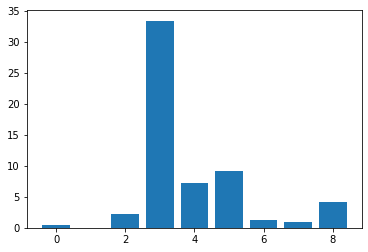

In [13]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [30]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_chi, y_train_le)
y_pred = model.predict(X_test_chi)

In [31]:
print(f'Model Accuracy: {accuracy_score(y_pred, y_test_le)*100:.2f}%')
accuracies = cross_val_score(estimator=model, X=X_train_chi, y=y_train_le, cv=5)
print('Cross val accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('cross val std: {:.2f}%'.format(accuracies.std()*100))
print(classification_report(y_pred, y_test_le, zero_division=1))

Model Accuracy: 73.26%
Cross val accuracy: 75.00%
cross val std: 4.18%
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        77
           1       0.28      1.00      0.44         9

    accuracy                           0.73        86
   macro avg       0.64      0.85      0.63        86
weighted avg       0.92      0.73      0.78        86



In this model reports performance just four of the nine input features selected using the chi-squared statistic. We see that the model achieved an accuracy of about 73.26 percent and cross val accuracy same with model before about 75 percent, a slight up in performance

## Part 3. Build Model With Feature Selection Using Mutual Information

In [37]:
from sklearn.feature_selection import mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k=6)
fs.fit(X_train_oe, y_train_le)
X_train_mi = fs.transform(X_train_oe)
X_test_mi = fs.transform(X_test_oe)

In [38]:
for i in range(len(fs.scores_)):
    print('feature %d: %f' % (i, fs.scores_[i]))

feature 0: 0.000000
feature 1: 0.023623
feature 2: 0.043372
feature 3: 0.067822
feature 4: 0.021120
feature 5: 0.030432
feature 6: 0.019427
feature 7: 0.039093
feature 8: 0.076698


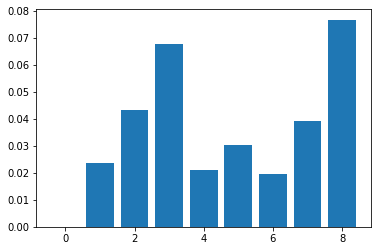

In [39]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [40]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_mi, y_train_le)
y_pred = model.predict(X_test_mi)

In [41]:
print(f'Model Accuracy: {accuracy_score(y_pred, y_test_le)*100:.2f}%')
accuracies = cross_val_score(estimator=model, X=X_train_mi, y=y_train_le, cv=5)
print('Cross val accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('cross val std: {:.2f}%'.format(accuracies.std()*100))
print(classification_report(y_pred, y_test_le, zero_division=1))

Model Accuracy: 75.58%
Cross val accuracy: 74.00%
cross val std: 3.39%
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        75
           1       0.34      1.00      0.51        11

    accuracy                           0.76        86
   macro avg       0.67      0.86      0.67        86
weighted avg       0.92      0.76      0.80        86



In this model reports performance just six of the nine input features selected using the mutual information statistic. We see that the model achieved an accuracy of about 75 percent and a little drop cross val accuracy about 74 percent. 

#  Conclusion

After comparing the results of the three models we get better performance when not use all of the input features but just the most relevant feature to target